(prob-input:probabilistic-input-model)=
# Creating a Probabilistic Input Model

The input of an uncertainty quantification (UQ) test function is modeled probabilistically.
In the case of multi-dimensional input,
the whole input model is, in essence, a multivariate random variable (or random vector).
Each of the input variables is represented as a univariate random variable.
A fully-specified probabilistic input model
then combines all the univariate random variables under some prescribed dependency structures.

```{note}
Currently, UQTestFuns does not support specifying dependency between random variables.
Specifically, all input variables can only be modeled as independent random variables.
```

This page explains how a probabilistic input model can be specified in UQTestFuns.
It assumes some familiarity with the univariate random variable explained on the previous page.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import uqtestfuns as uqtf

Suppose we want to define the probabilistic input model of a three-dimensional function.
The probabilistic input model is then a multivariate random variable with a three-dimensional joint probability distribution.
The one-dimensional marginal density of the distribution for each of the input variables is shown in the table below. 

| No. | Name  | Distribution  |                   Parameters                   |
|:---:|:-----:|:-------------:|:----------------------------------------------:|
| 1.  | $X_1$ | Gumbel (max.) |           $\mu = 3.0, \beta = 4.0$             |
| 2.  | $X_2$ |   Normal      |              $\mu=1, \sigma=0.2$               |
| 3.  | $X_3$ |     Beta      | $\alpha = 5.0, \beta = 2.0, a = 0.25, b = 1.0$ |

Moreover, it is assumed that all the input variables are statistically independent.

## One-dimensional marginals

The first step of creating the probabilistic input model is to define
all one-dimensional marginals according to the specification above.
One-dimensional marginals are the distributions
of the component univariate random variables.
In UQTestFuns, a univariate random variable is represented by ``UnivDist`` class
(please refer to {ref}`prob-input:univariate-random-variable` for more detail).
Because three marginals belong to a single probabilistic input model,
we need to collect all the marginals inside a list (or a tuple) as follows:

In [2]:
my_marginals = [
  uqtf.UnivDist(
      distribution="gumbel", parameters=[3, 4], name="X1", description="1st input"
  ),
  uqtf.UnivDist(
      distribution="normal", parameters=[1, 0.2], name="X2", description="2nd input"
  ),
  uqtf.UnivDist(
      distribution="beta", parameters=[5, 2, 0.25, 1.0], name="X3", description="3rd input"
  ),
]

Note that in the snippet above,
the parameters `name` and `description` of `UnivDist()` are optional.

## A ``ProbInput`` instance

A probabilistic input model in UQTestFuns is represented by the ``ProbInput`` class.
To create an instance of the class, you need to pass the following arguments:

- `marginals`: a list or tuple of one-dimensional marginals each represented by an instance of ``UnivDist``.
- `name`: the name of the probabilistic input model (optional)
- `description`: a short text describing the input model (optional)

Once we define all the marginals,
we create a probabilistic input model as follows:

In [3]:
my_probinput = uqtf.ProbInput(
  marginals=my_marginals,
  name="MyProbInput",
  description="My probabilistic input",
)

The variable `my_probinput` now stores an instance of a probabilistic input model
consisting of three independent random variables.
You can print the instance to the terminal to verify it:

In [4]:
print(my_probinput)

Name         : MyProbInput
Spatial Dim. : 3
Description  : My probabilistic input
Marginals    :

  No.   Name    Distribution        Parameters         Description
-----  ------  --------------  ---------------------  -------------
    1    X1        gumbel              [3 4]            1st input
    2    X2        normal            [1.  0.2]          2nd input
    3    X3         beta       [5.   2.   0.25 1.  ]    3rd input

Copulas      : None


An instance of ``UnivDist`` exposes the following properties:

|      Property       |                                             Description                                              |
|:-------------------:|:----------------------------------------------------------------------------------------------------:|
|       `name`        |                  the assigned name of the probabilistic input model (may be `None`)                  |
|    `description`    |          the assigned description of the probabilistic input model (may be `None`)                   |
|    `marginals`      |                       One-dimensional marginal distribution of the input model                       | 
| `spatial_dimension` |                             the number of dimensions of the input model                              |
|      `copulas`      | specified copulas that model dependency structure between random variables (currently not supported) |

and methods:

|            Method             |                                     Description                                      |
|:-----------------------------:|:------------------------------------------------------------------------------------:|
|   `get_sample(sample_size)`   |                get a sample of size `sample_size` from the                           |
| `transform_sample(xx, other)` | transform a set of sample values `xx` (of this distribution) to `other` distribution |

Below, we'll go quickly through each of the methods.

```{note}
In UQTestFuns, one-dimensional probabilistic input models are still represented
as instances of `ProbInput` eventhough they only have one marginal.
This is because a one-dimensional probabilistic input
and a univariate random variable are conceptually different.
```

## Getting a sample

A random sample of a given size can be generated
from the probabilistic input model using the `get_sample()` method.

For instance, to generate $5$ sample points, type:

In [5]:
xx_sample = my_probinput.get_sample(5)
xx_sample

array([[ 2.88659735,  0.87402671,  0.76415827],
       [-1.08248831,  1.17020289,  0.93925928],
       [-2.08586512,  1.16049305,  0.81235921],
       [ 7.24878067,  1.10977001,  0.78156364],
       [ 4.98915815,  1.37195873,  0.81534628]])

Notice that the sample values are given as a $5$-by-$3$ array.
In general, a sample of size $N$ for an $M$-dimensional probabilistic input model will be given as an $N$-by-$M$ array.

Shown below is the corner plot from $1'000$ sample points.
The plot shows the histograms for each one-dimensional marginal
as well as the scatter plots for each possible pair.

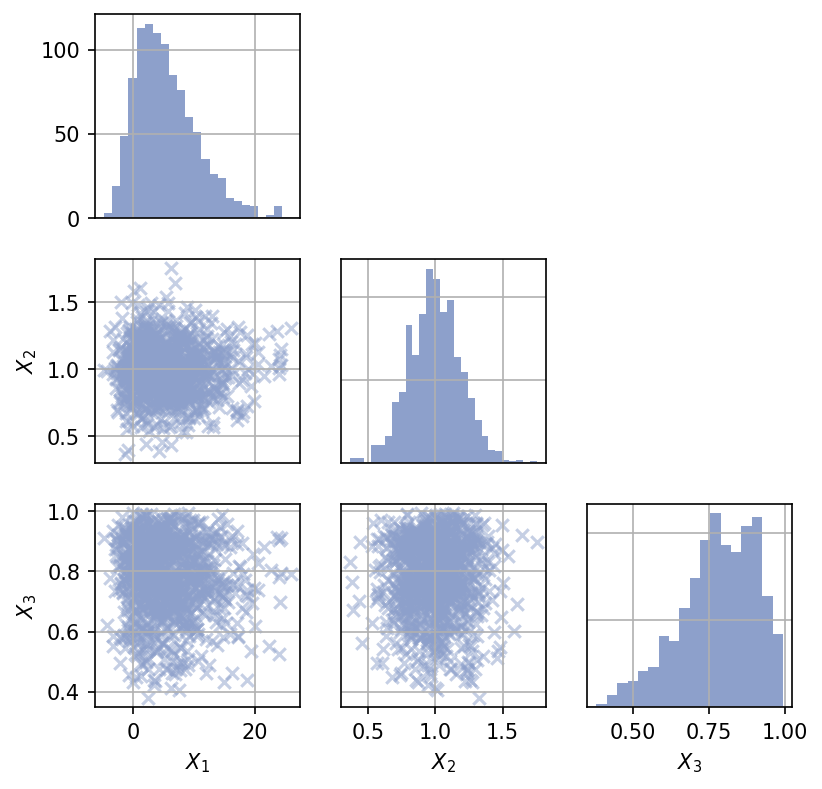

In [6]:
xx_sample = my_probinput.get_sample(1000)

fig, axs = plt.subplots(3, 3, figsize=(6, 6))

axs[0, 1].axis('off')
axs[0, 2].axis('off')
axs[1, 2].axis('off')

axs[0, 0].hist(xx_sample[:, 0], bins="auto", color="#8da0cb")
axs[0, 0].grid()
axs[0, 0].tick_params("x", bottom=False, labelbottom=False)

axs[1, 0].scatter(xx_sample[:, 0], xx_sample[:, 1], marker="x", color="#8da0cb", alpha=0.5)
axs[1, 0].grid()
axs[1, 0].tick_params("x", bottom=False, labelbottom=False)
axs[1, 0].set_ylabel("$X_2$")

axs[1, 1].hist(xx_sample[:, 1], bins="auto", color="#8da0cb")
axs[1, 1].grid()
axs[1, 1].tick_params("y", left=False, labelleft=False)
axs[1, 1].tick_params("x", bottom=False, labelbottom=False)

axs[2, 0].scatter(xx_sample[:, 0], xx_sample[:, 2], marker="x", color="#8da0cb", alpha=0.5)
axs[2, 0].grid()
axs[2, 0].set_xlabel("$X_1$")
axs[2, 0].set_ylabel("$X_3$")

axs[2, 1].scatter(xx_sample[:, 1], xx_sample[:, 2], marker="x", color="#8da0cb", alpha=0.5)
axs[2, 1].grid()
axs[2, 1].tick_params("y", left=False, labelleft=False)
axs[2, 1].set_xlabel("$X_2$")

axs[2, 2].hist(xx_sample[:, 2], bins="auto", color="#8da0cb")
axs[2, 2].grid()
axs[2, 2].tick_params("y", left=False, labelleft=False)
axs[2, 2].set_xlabel("$X_3$")

#fig.tight_layout(pad=1)
plt.gcf().set_dpi(150)

## Transforming a sample

Using the `transform_sample()` method we can transform a sample generated
from one probabilistic input model to another 
with the same number of spatial dimensions.

Let's suppose we define a three-dimensional probabilistic input model
consisting of three independent standard uniform distributions.

In [7]:
my_marginals_2 = [
  uqtf.UnivDist(distribution="uniform", parameters=[0, 1], name="X1", description="1st input"),
  uqtf.UnivDist(distribution="uniform", parameters=[0, 1], name="X2", description="2nd input"),
  uqtf.UnivDist(distribution="uniform", parameters=[0, 1], name="X3", description="3rd input"),
]
my_probinput_2 = uqtf.ProbInput(
  marginals=my_marginals_2,
  name="MyProbInput-2",
  description="My 2nd probabilistic input",
  )
print(my_probinput_2)

Name         : MyProbInput-2
Spatial Dim. : 3
Description  : My 2nd probabilistic input
Marginals    :

  No.   Name    Distribution    Parameters    Description
-----  ------  --------------  ------------  -------------
    1    X1       uniform         [0 1]        1st input
    2    X2       uniform         [0 1]        2nd input
    3    X3       uniform         [0 1]        3rd input

Copulas      : None


A sample from this probabilistic input model can be transformed into a sample from our initial input model as follows:

In [8]:
xx_sample_2 = my_probinput_2.get_sample(1000)
xx_sample_1 = my_probinput_2.transform_sample(xx_sample_2, my_probinput)

The histogram of the transformed sample is shown below.
They look similar to the ones before;
that is, the sample is distributed as if it was generated directly
from the original probabilistic input model.

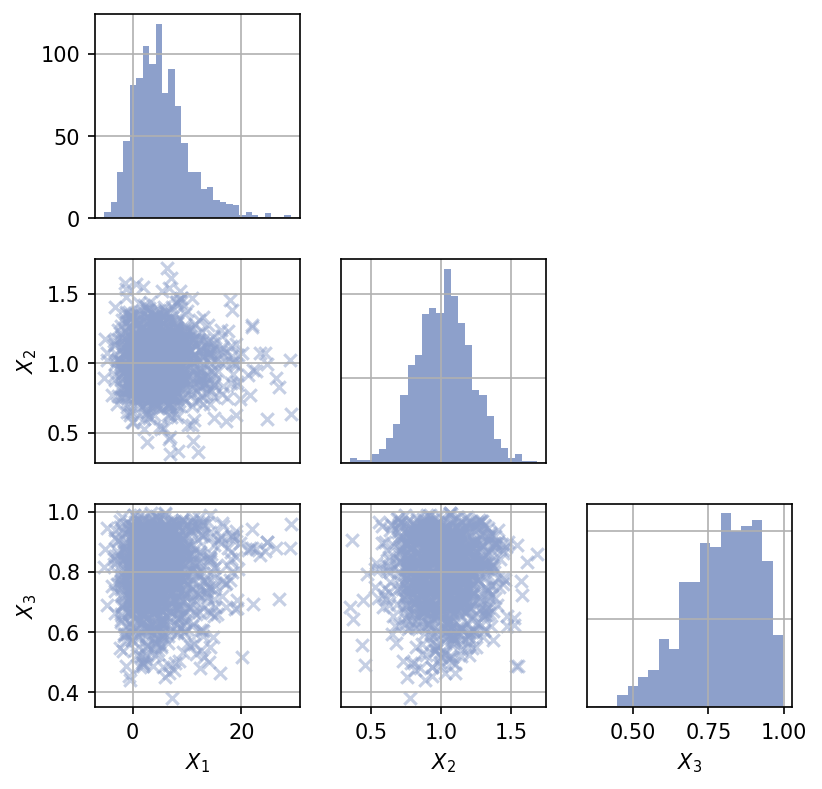

In [9]:
fig, axs = plt.subplots(3, 3, figsize=(6, 6))

axs[0, 1].axis('off')
axs[0, 2].axis('off')
axs[1, 2].axis('off')

axs[0, 0].hist(xx_sample_1[:, 0], bins="auto", color="#8da0cb")
axs[0, 0].grid()
axs[0, 0].tick_params("x", bottom=False, labelbottom=False)

axs[1, 0].scatter(xx_sample_1[:, 0], xx_sample_1[:, 1], marker="x", color="#8da0cb", alpha=0.5)
axs[1, 0].grid()
axs[1, 0].tick_params("x", bottom=False, labelbottom=False)
axs[1, 0].set_ylabel("$X_2$")

axs[1, 1].hist(xx_sample_1[:, 1], bins="auto", color="#8da0cb")
axs[1, 1].grid()
axs[1, 1].tick_params("y", left=False, labelleft=False)
axs[1, 1].tick_params("x", bottom=False, labelbottom=False)

axs[2, 0].scatter(xx_sample_1[:, 0], xx_sample_1[:, 2], marker="x", color="#8da0cb", alpha=0.5)
axs[2, 0].grid()
axs[2, 0].set_xlabel("$X_1$")
axs[2, 0].set_ylabel("$X_3$")

axs[2, 1].scatter(xx_sample_1[:, 1], xx_sample_1[:, 2], marker="x", color="#8da0cb", alpha=0.5)
axs[2, 1].grid()
axs[2, 1].tick_params("y", left=False, labelleft=False)
axs[2, 1].set_xlabel("$X_2$")

axs[2, 2].hist(xx_sample_1[:, 2], bins="auto", color="#8da0cb")
axs[2, 2].grid()
axs[2, 2].tick_params("y", left=False, labelleft=False)
axs[2, 2].set_xlabel("$X_3$")

#fig.tight_layout(pad=1)
plt.gcf().set_dpi(150)